# Chapter 17: Experiments with Blocks

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from scipy import stats

## Randomised block design

In [2]:
oatvar = pd.read_csv("data/oatvar.csv", index_col=0, dtype={'yield':'int','block':'category','variety':'category'})
oatvar.head()

,yield,block,variety
1,296,I,1
2,357,II,1
3,340,III,1
4,331,IV,1
5,348,V,1


Display the data as a table:

In [3]:
oatvar.pivot(index = 'variety', columns='block', values='yield')

block,I,II,III,IV,V
variety,,,,,
1,296,357,340,331,348
2,402,390,431,340,320
3,437,334,426,320,296
4,303,319,310,260,242
5,469,405,442,487,394
6,345,342,358,300,308
7,324,339,357,352,220
8,488,374,401,338,320


Make plots of the data:

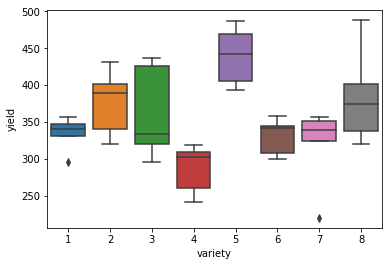

In [4]:
sns.boxplot(x="variety", y="yield", data=oatvar)
plt.show()

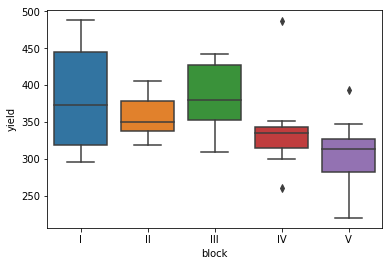

In [5]:
sns.boxplot(x="block", y="yield", data=oatvar)
plt.show()

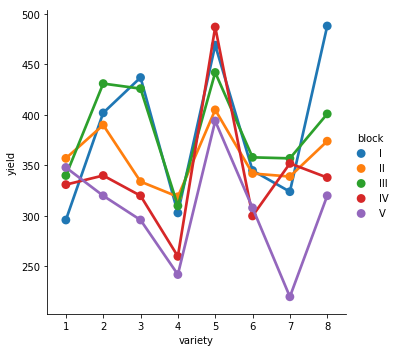

In [6]:
sns.catplot(x='variety',y='yield',hue='block', data=oatvar, kind='point')
plt.show()

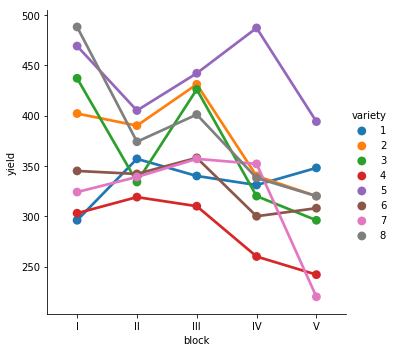

In [7]:
sns.catplot(x='block',y='yield',hue='variety', data=oatvar, kind='point')
plt.show()

The obvious way to fit the model fails, apparently because `patsy` doesn't like the response to be called `yield`.

In [8]:
try:
    lmod = smf.ols('yield ~ variety + block', oatvar).fit()
    lmod.summary()
except:
    pass

Look at the design matrix:

In [9]:
import patsy
dm = patsy.dmatrix('~ variety + block', oatvar)
np.asarray(dm)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 1., 0., 0.,

In [10]:
lmod = sm.OLS(oatvar['yield'], dm).fit()
lmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  yield   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     7.542
Date:                Tue, 25 Sep 2018   Prob (F-statistic):           7.72e-06
Time:                        15:44:55   Log-Likelihood:                -193.59
No. Observations:                  40   AIC:                             411.2
Df Residuals:                      28   BIC:                             431.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        363.2750     20.027     18.139      0.000     322.252     404.298
x1            42.2000     23.125      1.825      0.079      -5.169      89.569
x2            28.2000     23.125      1.219      0.233     -19.169      75.569
x3           -47.6000     23.125     -2.058      0.049     -94.969      -0.231
x4           105.0000     23.125      4.541      0.000      57.631     152.369
x5            -3.8000     23.125     -0.164      0.871     -51.169      43.569
x6           -16.0000     23.125     -0.692      0.495     -63.369      31.369
x7            49.8000     23.125      2.154      0.040       2.431      97.169
x8           -25.5000     18.282     -1.395      0.174     -62.949      11.949
x9             0.1250     18.282      0.007      0.995     -37.324      37.574
x10          -42.0000     18.282     -2.297      0.029     -79.449      -4.551
x11          -77.0000     18.282     -4.212      0.000    -114.449     -39.551
==============================================================================
Omnibus:                        1.932   Durbin-Watson:                   2.562
Prob(Omnibus):                  0.381   Jarque-Bera (JB):                1.397
Skew:                           0.458   Prob(JB):                        0.497
Kurtosis:                       3.015   Cond. No.                         9.57
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Another solution is to create a response with a new name:

In [11]:
oatvar['y'] = oatvar['yield']
lmod = smf.ols('y ~ variety + block', oatvar).fit()
sm.stats.anova_lm(lmod).round(3)

,df,sum_sq,mean_sq,F,PR(>F)
variety,7.0,77523.575,11074.796,8.284,0.000
block,4.0,33395.500,8348.875,6.245,0.001
Residual,28.0,37433.300,1336.904,NaN,NaN


Fit with only block

In [12]:
lmod = smf.ols('y ~ block', oatvar).fit()
sm.stats.anova_lm(lmod).round(3)

,df,sum_sq,mean_sq,F,PR(>F)
block,4.0,33395.500,8348.875,2.542,0.057
Residual,35.0,114956.875,3284.482,NaN,NaN


Leave out the first observation:

In [13]:
oat1 = oatvar.iloc[1:,]
lmod = smf.ols('y ~ variety + block', oat1).fit()
sm.stats.anova_lm(lmod).round(3)

,df,sum_sq,mean_sq,F,PR(>F)
variety,7.0,75901.631,10843.090,9.454,0.0
block,4.0,38017.908,9504.477,8.287,0.0
Residual,27.0,30967.692,1146.952,NaN,NaN


Change the factor order:

In [14]:
lmod = smf.ols('y ~ block + variety', oat1).fit()
sm.stats.anova_lm(lmod).round(3)

,df,sum_sq,mean_sq,F,PR(>F)
block,4.0,38580.641,9645.160,8.409,0.0
variety,7.0,75338.897,10762.700,9.384,0.0
Residual,27.0,30967.692,1146.952,NaN,NaN


Or use type III ANOVA which is like `drop()` in R

In [15]:
sm.stats.anova_lm(lmod,typ=3)

,sum_sq,df,F,PR(>F)
Intercept,358745.360119,1.0,312.781616,2.244635e-16
block,38017.908036,4.0,8.286729,1.699669e-04
variety,75338.897321,7.0,9.383744,7.266460e-06
Residual,30967.691964,27.0,NaN,NaN


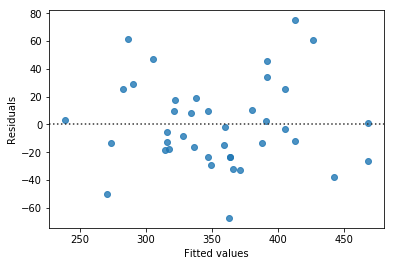

In [16]:
lmod = smf.ols('y ~ variety + block', oatvar).fit()
sns.residplot(lmod.fittedvalues, lmod.resid)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.show()

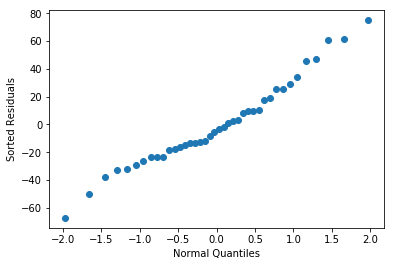

In [17]:
res = np.sort(lmod.resid)
n = len(res)
qq = stats.norm.ppf(np.arange(1,n+1)/(n+1))

fig, ax = plt.subplots()
ax.scatter(qq, res)
   
plt.xlabel("Normal Quantiles")
plt.ylabel("Sorted Residuals")
plt.show()

Do the interaction test:

In [18]:
lmod.params

Intercept       363.275
variety[T.2]     42.200
variety[T.3]     28.200
variety[T.4]    -47.600
variety[T.5]    105.000
variety[T.6]     -3.800
variety[T.7]    -16.000
variety[T.8]     49.800
block[T.II]     -25.500
block[T.III]      0.125
block[T.IV]     -42.000
block[T.V]      -77.000
dtype: float64

In [19]:
varcoefs = np.append([0.],lmod.params[1:8])
varcoefs = np.repeat(varcoefs,5)
blockcoefs = np.append([0.],lmod.params[8:12])
blockcoefs = np.tile(blockcoefs,8)

In [20]:
oatvar['crossp'] = varcoefs * blockcoefs
tmod = smf.ols("y ~ variety + block + crossp", oatvar).fit()
tmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     6.718
Date:                Tue, 25 Sep 2018   Prob (F-statistic):           2.08e-05
Time:                        15:44:55   Log-Likelihood:                -193.47
No. Observations:                  40   AIC:                             412.9
Df Residuals:                      27   BIC:                             434.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      362.2421     20.505     17.666      0.000     320.169     404.316
variety[T.2]    44.4099     24.146      1.839      0.077      -5.134      93.954
variety[T.3]    29.6768     23.781      1.248      0.223     -19.118      78.471
variety[T.4]   -50.0927     24.324     -2.059      0.049    -100.001      -0.184
variety[T.5]   110.4985     27.335      4.042      0.000      54.412     166.585
variety[T.6]    -3.9990     23.488     -0.170      0.866     -52.192      44.194
variety[T.7]   -16.8379     23.579     -0.714      0.481     -65.218      31.542
variety[T.8]    52.4079     24.402      2.148      0.041       2.339     102.477
block[T.II]    -24.5878     18.709     -1.314      0.200     -62.975      13.800
block[T.III]     0.1205     18.564      0.006      0.995     -37.970      38.211
block[T.IV]    -40.4975     18.954     -2.137      0.042     -79.388      -1.607
block[T.V]     -74.2455     19.844     -3.742      0.001    -114.961     -33.530
crossp           0.0018      0.005      0.393      0.697      -0.008       0.011
==============================================================================
Omnibus:                        1.627   Durbin-Watson:                   2.540
Prob(Omnibus):                  0.443   Jarque-Bera (JB):                1.167
Skew:                           0.418   Prob(JB):                        0.558
Kurtosis:                       2.986   Cond. No.                     1.70e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Relative efficiency

In [21]:
lmcrd = smf.ols("y ~ variety", oatvar).fit()
np.sqrt(lmcrd.scale)

47.04678522492265

In [22]:
np.sqrt(lmod.scale)

36.563691983011935

In [23]:
lmcrd.scale/lmod.scale

1.6556167903978543

## Latin square

In [24]:
abrasion = pd.read_csv("data/abrasion.csv", index_col=0, 
                     dtype={'run':'category','position':'category','material':'category','wear':'int'})
abrasion.head()

,run,position,material,wear
1,1,1,C,235
2,1,2,D,236
3,1,3,B,218
4,1,4,A,268
5,2,1,A,251


See the Latin square layout:

In [25]:
abrasion.pivot(index = 'run', columns='position', values='wear')

position,1,2,3,4
run,,,,
1,235,236,218,268
2,251,241,227,229
3,234,273,274,226
4,195,270,230,225


In [26]:
abrasion.pivot(index = 'run', columns='position', values='material')

position,1,2,3,4
run,,,,
1,C,D,B,A
2,A,B,D,C
3,D,C,A,B
4,B,A,C,D


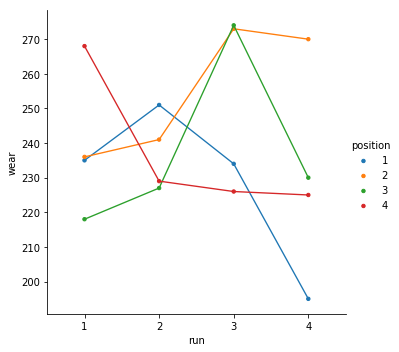

In [27]:
sns.catplot(x='run',y='wear',hue='position', data=abrasion, kind='point',scale=0.5)

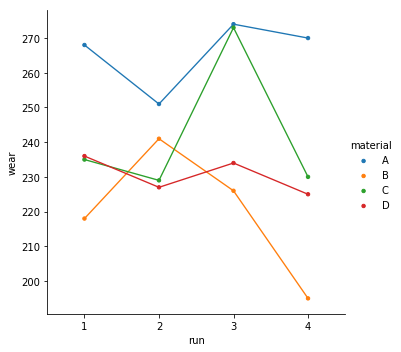

In [28]:
sns.catplot(x='run',y='wear',hue='material', data=abrasion, kind='point',scale=0.5)

In [29]:
lmod = smf.ols('wear ~ run + position + material', abrasion).fit()
sm.stats.anova_lm(lmod,typ=3).round(3)

,sum_sq,df,F,PR(>F)
Intercept,103836.1,1.0,1695.283,0.000
run,986.5,3.0,5.369,0.039
position,1468.5,3.0,7.992,0.016
material,4621.5,3.0,25.151,0.001
Residual,367.5,6.0,NaN,NaN


In [30]:
%%capture --no-display
lmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wear   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     12.84
Date:                Tue, 25 Sep 2018   Prob (F-statistic):            0.00283
Time:                        15:44:56   Log-Likelihood:                -47.776
No. Observations:                  16   AIC:                             115.6
Df Residuals:                       6   BIC:                             123.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       254.7500      6.187     41.174      0.000     239.611     269.889
run[T.2]         -2.2500      5.534     -0.407      0.698     -15.791      11.291
run[T.3]         12.5000      5.534      2.259      0.065      -1.041      26.041
run[T.4]         -9.2500      5.534     -1.671      0.146     -22.791       4.291
position[T.2]    26.2500      5.534      4.743      0.003      12.709      39.791
position[T.3]     8.5000      5.534      1.536      0.175      -5.041      22.041
position[T.4]     8.2500      5.534      1.491      0.187      -5.291      21.791
material[T.B]   -45.7500      5.534     -8.267      0.000     -59.291     -32.209
material[T.C]   -24.0000      5.534     -4.337      0.005     -37.541     -10.459
material[T.D]   -35.2500      5.534     -6.370      0.001     -48.791     -21.709
==============================================================================
Omnibus:                        0.393   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.822   Jarque-Bera (JB):                0.466
Skew:                          -0.298   Prob(JB):                        0.792
Kurtosis:                       2.414   Cond. No.                         6.34
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Do the Tukey computation:

In [31]:
from statsmodels.sandbox.stats.multicomp import get_tukeyQcrit
get_tukeyQcrit(4,6)*lmod.bse[1]/np.sqrt(2)

19.174282907060704

In [32]:
mcoefs = np.append([0],lmod.params[7:10])
nmats = ['A','B','C','D']

In [33]:
import itertools
dp = set(itertools.combinations(range(0,4),2))
dcoef = []
namdiff = []
for cp in dp:
    dcoef.append(mcoefs[cp[0]] - mcoefs[cp[1]])
    namdiff.append(nmats[cp[0]] + '-' + nmats[cp[1]])
thsd = pd.DataFrame({'Difference':dcoef},index=namdiff)
thsd["lb"] = thsd.Difference - get_tukeyQcrit(4,6) * lmod.bse[1]/np.sqrt(2)
thsd["ub"] = thsd.Difference + get_tukeyQcrit(4,6) * lmod.bse[1]/np.sqrt(2)
thsd.round(2)

,Difference,lb,ub
A-B,45.75,26.58,64.92
B-C,-21.75,-40.92,-2.58
B-D,-10.50,-29.67,8.67
C-D,11.25,-7.92,30.42
A-D,35.25,16.08,54.42
A-C,24.00,4.83,43.17


Relative efficiency

In [34]:
lmodr = smf.ols('wear ~ material', abrasion).fit()
lmodr.scale/lmod.scale

3.8401360544217713

# Balanced incomplete block design

In [35]:
rabbit = pd.read_csv("data/rabbit.csv", index_col=0, 
                     dtype={'treat':'category','gain':'float','block':'category'})
rabbit.head()

,treat,gain,block
1,f,42.2,b1
2,b,32.6,b1
3,c,35.2,b1
4,c,40.9,b2
5,a,40.1,b2


Show the arrange of the BIB. I replace the NaNs with spaces for clarity.

In [36]:
pt = rabbit.pivot(index = 'treat', columns='block', values='gain')
pt.replace(np.nan," ", regex=True)

block,b1,b10,b2,b3,b4,b5,b6,b7,b8,b9
treat,,,,,,,,,,
a,,37.3,40.1,,44.9,,,45.2,44,
b,32.6,,38.1,,,,37.3,40.6,,30.6
c,35.2,,40.9,34.6,43.9,40.9,,,,
d,,42.3,,37.5,,37.3,,37.9,,27.5
e,,,,,40.8,32,40.5,,38.5,20.6
f,42.2,41.7,,34.3,,,42.8,,51.9,


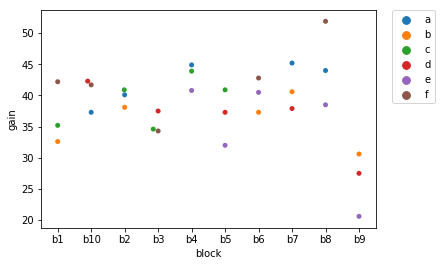

In [37]:
sns.swarmplot(x='block',y='gain',hue='treat',data=rabbit)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

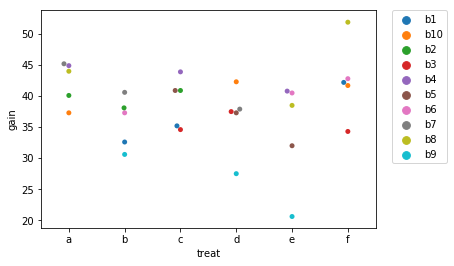

In [38]:
sns.swarmplot(x='treat',y='gain',hue='block',data=rabbit)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [39]:
lmod = smf.ols('gain ~ treat + block', rabbit).fit()
sm.stats.anova_lm(lmod,typ=3).round(3)

,sum_sq,df,F,PR(>F)
Intercept,1945.500,1.0,193.553,0.000
treat,158.727,5.0,3.158,0.038
block,595.735,9.0,6.585,0.001
Residual,150.773,15.0,NaN,NaN


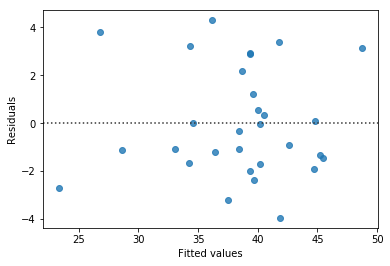

In [40]:
sns.residplot(lmod.fittedvalues, lmod.resid)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.show()

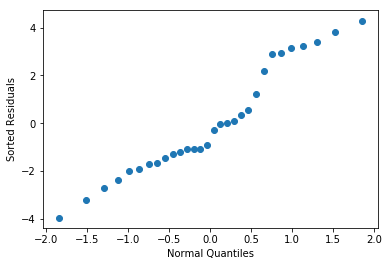

In [41]:
res = np.sort(lmod.resid)
n = len(res)
qq = stats.norm.ppf(np.arange(1,n+1)/(n+1))

fig, ax = plt.subplots()
ax.scatter(qq, res)
   
plt.xlabel("Normal Quantiles")
plt.ylabel("Sorted Residuals")
plt.show()

In [42]:
lmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   gain   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     6.318
Date:                Tue, 25 Sep 2018   Prob (F-statistic):           0.000518
Time:                        15:44:57   Log-Likelihood:                -66.787
No. Observations:                  30   AIC:                             163.6
Df Residuals:                      15   BIC:                             184.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       36.0139      2.589     13.912      0.000      30.496      41.531
treat[T.b]      -1.7417      2.242     -0.777      0.449      -6.520       3.037
treat[T.c]       0.4000      2.242      0.178      0.861      -4.378       5.178
treat[T.d]       0.0667      2.242      0.030      0.977      -4.712       4.845
treat[T.e]      -5.2250      2.242     -2.331      0.034     -10.003      -0.447
treat[T.f]       3.3000      2.242      1.472      0.162      -1.478       8.078
block[T.b10]     3.2972      2.796      1.179      0.257      -2.662       9.257
block[T.b2]      4.1333      2.694      1.534      0.146      -1.610       9.876
block[T.b3]     -1.8028      2.694     -0.669      0.514      -7.546       3.940
block[T.b4]      8.7944      2.796      3.145      0.007       2.835      14.754
block[T.b5]      2.3056      2.796      0.825      0.423      -3.654       8.265
block[T.b6]      5.4083      2.694      2.007      0.063      -0.335      11.151
block[T.b7]      5.7778      2.796      2.066      0.057      -0.182      11.737
block[T.b8]      9.4278      2.796      3.372      0.004       3.468      15.387
block[T.b9]     -7.4806      2.796     -2.675      0.017     -13.440      -1.521
==============================================================================
Omnibus:                        2.951   Durbin-Watson:                   2.921
Prob(Omnibus):                  0.229   Jarque-Bera (JB):                1.909
Skew:                           0.401   Prob(JB):                        0.385
Kurtosis:                       2.060   Cond. No.                         12.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Tukey pairwise differences:

In [43]:
mcoefs = np.append([0],lmod.params[1:6])
nmats = [chr(i) for i in range(ord('a'),ord('f')+1)]

In [44]:
p = len(mcoefs)
dp = set(itertools.combinations(range(0,p),2))
dcoef = []
namdiff = []
for cp in dp:
    dcoef.append(mcoefs[cp[0]] - mcoefs[cp[1]])
    namdiff.append(nmats[cp[0]] + '-' + nmats[cp[1]])
thsd = pd.DataFrame({'Difference':dcoef},index=namdiff)
thsd["lb"] = thsd.Difference - get_tukeyQcrit(p,lmod.df_resid) * lmod.bse[1]/np.sqrt(2)
thsd["ub"] = thsd.Difference + get_tukeyQcrit(p,lmod.df_resid) * lmod.bse[1]/np.sqrt(2)
thsd.round(2)

,Difference,lb,ub
a-b,1.74,-5.53,9.02
b-c,-2.14,-9.42,5.13
b-d,-1.81,-9.08,5.47
e-f,-8.53,-15.80,-1.25
b-e,3.48,-3.79,10.76
b-f,-5.04,-12.32,2.23
c-e,5.62,-1.65,12.90
a-f,-3.30,-10.58,3.98
c-d,0.33,-6.94,7.61
c-f,-2.90,-10.18,4.38


Relative efficiency

In [45]:
lmodr = smf.ols('gain ~ treat', rabbit).fit()
lmodr.scale/lmod.scale

3.094507555519525

In [46]:
%load_ext version_information
%version_information pandas, numpy, matplotlib, seaborn, scipy, patsy, statsmodels

Software,Version
Python,3.7.0 64bit [Clang 4.0.1 (tags/RELEASE_401/final)]
IPython,6.5.0
OS,Darwin 17.7.0 x86_64 i386 64bit
pandas,0.23.4
numpy,1.15.1
matplotlib,2.2.3
seaborn,0.9.0
scipy,1.1.0
patsy,0.5.0
statsmodels,0.9.0
